In [42]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load xls sheet with data
df = pd.read_csv('StandardizedDataFrameWithNansFilled.csv', index_col=0)
w, l = df.shape
print(w,l)
country = df.iloc[:, 0].tolist()
df.drop(columns =["Country"],inplace = True)

develop = df.iloc[:,1].tolist()
developNames = sorted(set(develop))[::-1] # Creates a list of all the variable types from classLabels

D = len(developNames)
developDict = dict(zip(developNames,range(2))) #0 for developed; 1 for developing
develop = np.asarray([developDict[value] for value in develop])
df["Status"] = develop


2938 19


In [43]:


cols = df.columns[1:]
for col in cols:
    df[col] = stats.zscore(df[col])
print(df.head())

   Year    Status  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0  2015 -0.459399         -0.444448         0.791586       0.268824 -1.140132   
1  2014 -0.459399         -0.980950         0.856072       0.285786 -1.140132   
2  2013 -0.459399         -0.980950         0.831890       0.302749 -1.140132   
3  2012 -0.459399         -1.023029         0.864132       0.328193 -1.140132   
4  2011 -0.459399         -1.054587         0.888314       0.345155 -1.140132   

   percentage expenditure  Measles       BMI   under-five deaths      Polio  \
0               -0.335570 -0.110384 -0.964715            0.255359 -3.254773   
1               -0.334441 -0.168124 -0.989810            0.274060 -1.039374   
2               -0.334594 -0.173531 -1.014905            0.292761 -0.868959   
3               -0.332096  0.032045 -1.040000            0.317696 -0.655940   
4               -0.367862  0.051757 -1.060076            0.342631 -0.613336   

   Total expenditure  Diphtheria    HI

In [44]:
df.to_numpy()

data = df.iloc[:, 1:]

X = np.empty((2938, 19))

ndata = data.to_numpy()

length, width = ndata.shape

countryNames = sorted(set(country)) # Creates a list of all the variable types from classLabels
countryDict = dict(zip(countryNames,range(193))) # turns that list into a dictionary
country = np.asarray([countryDict[value] for value in country])
C = len(country)


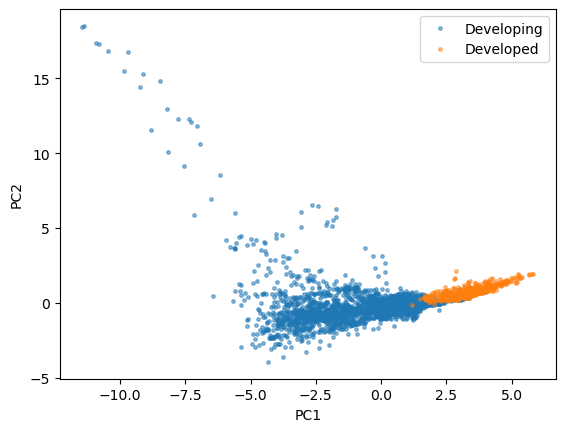

In [45]:
U,S,Vt = svd(ndata,full_matrices=False)
V = Vt.T

# Project the centered data onto principal component space
Z = ndata @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data

for d in range(D):
    # select indices belonging to class d:
    class_mask = develop==d
    plt.plot(Z[class_mask,i], Z[class_mask,j], '.', alpha=.5,markersize=5)
    #plt.legend(class_mask) i cant figure out how to plot legends
    plt.legend(developNames) # is this correct

plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
plt.savefig("PC1 and PC2_filled nans.png")
plt.show()
#maybe split for developed and developing countries and even split by continent?

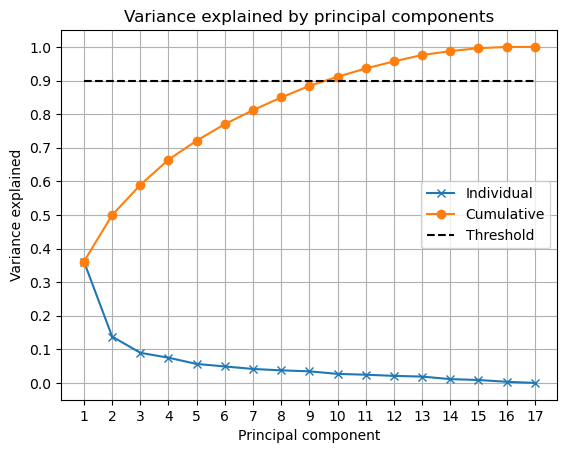

In [49]:
# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.xticks(range(1,len(df.columns[1:])+1,1))
plt.yticks([i / 10 for i in range(0, 11)])
plt.grid()
plt.savefig("Variance explained by priciple components_filled nans.png")
plt.show()


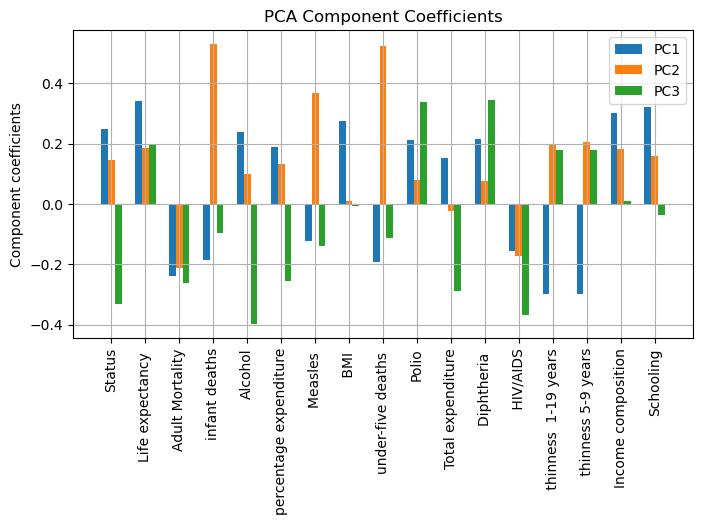

In [50]:


# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:

df.rename(columns= {"Income composition of resources":"Income composition"},inplace=True)
cols = df.columns[1:]

plt.figure(figsize=(8, 4))
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,width+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, cols, rotation='vertical')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.savefig("PCA Component Coefficients_filled nans.png", bbox_inches = "tight")
plt.show()

